## ДЗ урок 1

##### 1) Связанные списки  
Напишите функцию (пусть она будет называться reverse_linked_list), которая разворачивает связный список. На вход она принимает головную ноду, а на выход отдаёт хвостовую ноду исходного списка, но только теперь если попробовать пройтись по ней, она будет новой головной.

In [12]:
class Node(object):
    def __init__(self, value=None, next_node=None):
        self.value = value
        self.next = next_node

    def __str__(self):
        return f"[Node with value {self.value}]"


def print_linked_list(head):
    cur = head
    while cur is not None:
        print(cur)
        cur = cur.next

In [14]:
def reverse(head):
    if head is None:
        return None
    if head.next is None:
        return head
    cur = head.next
    head.next = None
    while cur is not None:
        next = cur.next
        cur.next = head
        head = cur
        cur = next
    return head

h, a, b, c, d = Node(10), Node(0), Node(30), Node(40), Node(1)

h.next = a
a.next = b
b.next = c
c.next = d

print_linked_list(h)
h = reverse(h)

[Node with value 10]
[Node with value 0]
[Node with value 30]
[Node with value 40]
[Node with value 1]


##### 2) Пузырьки  
Вам предлагается написать функцию, которая будет на вход получать голову несортированного связного списка, а на выход возвращать голову отсортированного.

In [15]:
def sort_nodes(head):
    cur = head
    while cur is not None:
        next = cur.next
        while next is not None:
            if cur.value > next.value:
                cur.value, next.value = next.value, cur.value
            next = next.next
        cur = cur.next
    return head

print_linked_list(h)
print_linked_list(sort_nodes(h))

[Node with value 1]
[Node with value 40]
[Node with value 30]
[Node with value 0]
[Node with value 10]
[Node with value 0]
[Node with value 1]
[Node with value 10]
[Node with value 30]
[Node with value 40]


#### 3) Pandas  
1. Выясните, сколько в среднем выходит полный счёт по пятницам на ланч у курящих мужчин (датасет tips)  

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
df_tips = pd.read_csv('data/tips.csv')
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [40]:
df_tips.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [41]:
le_masque = df_tips['sex'] == 'Male'
le_masque &= df_tips['day'] == 'Fri'
le_masque &= df_tips['smoker'] == 'No'
df_tips[le_masque]['total_bill'].mean()

17.475

2. Загрузите iris и посмотрите разбросы по всем числовым значениям для всех трёх классов цветов (датасет iris)

In [43]:
df_iris = pd.read_csv('data/iris.csv')
df_iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [79]:
df_iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [81]:
df_iris.Name.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

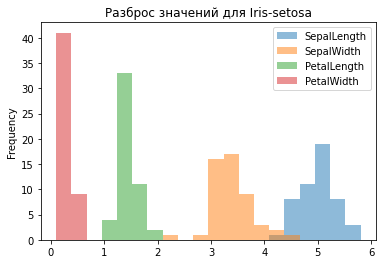

In [87]:
df_iris[df_iris.Name == 'Iris-setosa'].plot(kind='hist', bins = 20, alpha = 0.5)
plt.title("Разброс значений для Iris-setosa");

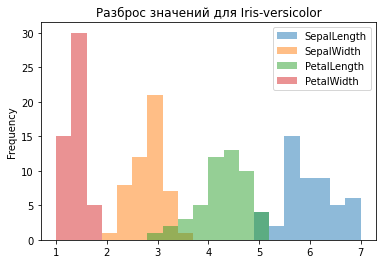

In [89]:
df_iris[df_iris.Name == 'Iris-versicolor'].plot(kind='hist', bins = 20, alpha = 0.5)
plt.title("Разброс значений для Iris-versicolor");

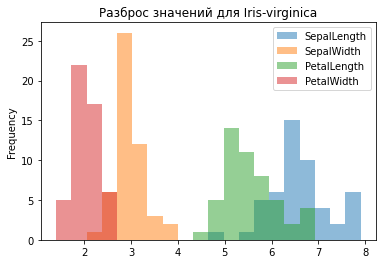

In [90]:
df_iris[df_iris.Name == 'Iris-virginica'].plot(kind='hist', bins = 20, alpha = 0.5)
plt.title("Разброс значений для Iris-virginica");

3. Создайте новый столбец с плотностью населения. Переименуйте названия первого и третьего столбца на русский язык

In [104]:
df = pd.DataFrame({
     'country': ['Kazakhstan', 'Russia', 'Belarus', 'Ukraine'],
     'population': [17.04, 143.5, 9.5, 45.5],
     'square': [2724902, 17125191, 207600, 603628]
 })

df

,country,population,square
0,Kazakhstan,17.04,2724902
1,Russia,143.50,17125191
2,Belarus,9.50,207600
3,Ukraine,45.50,603628


In [105]:
df['density'] = (df['population'] * 10e5) / df['square']

In [102]:
df['country'] = 'f'

In [106]:
df.rename(columns = {'country':'Страна', 'square':'Площадь'}, inplace = True )

In [107]:
df

,Страна,population,площадь,density
0,Kazakhstan,17.04,2724902,6.253436
1,Russia,143.50,17125191,8.379469
2,Belarus,9.50,207600,45.761079
3,Ukraine,45.50,603628,75.377550
